# GDP, life expectancy and their relationship
## Preparing the data

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import math


#testing the pandas and numpy

data_file = pd.read_csv('all_data.csv')
#print(data_file.head())
# print('######################')
#print(data_file[data_file['Country'] == 'Chile' and data_file['Year'] == '2000'])
#print(data_file.iloc[5])
print(data_file.info())
print(data_file.head())
# print(np.max(data_file['Year']))
# print(np.max(data_file['Life expectancy at birth (years)']))
print(np.max(data_file['GDP']))
print(np.min(data_file['GDP']))
data_chile = data_file[data_file['Country']=='Chile']
# print('######################')
# print(np.median(data_chile['Life expectancy at birth (years)']))
# print(np.median(data_file['Life expectancy at birth (years)']))
#Renaming the column to make it usable as an attribute
data_file.rename(columns = {'Life expectancy at birth (years)':'Life'}, inplace = True)
#Working out GDP values by dividing them through 1000000000
data_file.GDP = data_file['GDP'].apply(lambda x: round((x / 1000000000),4))

# print(data_file.head())
# print(data_file.Country.unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
18100000000000.0
4415702800.0


In [46]:
# #testing seaborn
# plt.figure(figsize=(20,10))
# sns.histplot(data_file['GDP'], binwidth=1000)
# plt.show()
# plt.clf()

# plt.hist(data_file['GDP'])
# #plt.axis([4400000000, 19000000000000, 0, 100])
# plt.show()
# plt.clf()

# print(np.max(data_file.GDP))

# Goal 1: Check trends over time and estimate the linear relationship between GDP and life expectancy
###	- plot a line chart showing each country's GDP and life expectancy trend
###	- estimate the linear correlation

The three plots below attempt to consolidate the data for all countries and present trends over time and the relationship between Life Expectancy and GDP.
What becomes immediately evident is that there is a significant discrepancy between each country's GDP, which consequently fails any attempt to draw a linear correlation between GDP and Life Expectancy when analyzing the data from all countries at once.

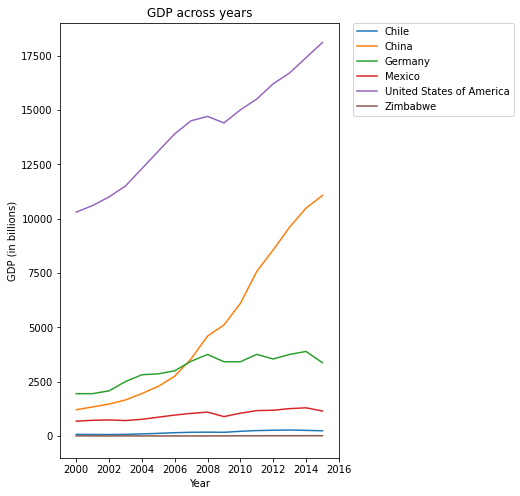

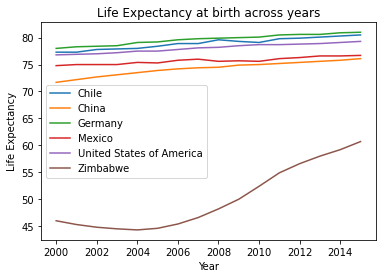

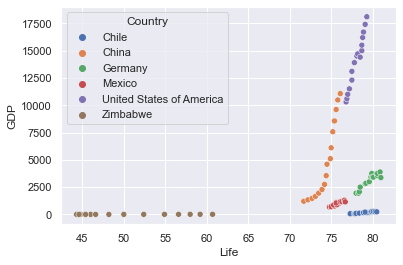

<Figure size 432x288 with 0 Axes>

In [51]:

plt.figure(figsize=[5,8])
for i in data_file.Country.unique():
    yvalues= data_file['GDP'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.) 
plt.axis([1999,2016,-1000,19000])
plt.title("GDP across years")
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.show()
plt.clf()

for i in data_file.Country.unique():
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)

plt.legend(data_file.Country.unique())   
plt.title("Life Expectancy at birth across years")
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()

sns.scatterplot(y = 'GDP', x = 'Life', data = data_file, hue = 'Country')
plt.show()
plt.clf()



Linear regression is not possible as the normality assumption is not met. This can be checked through statsmodels formula. The histogram drawn from the modeled data is not normally distributed by a long shot.

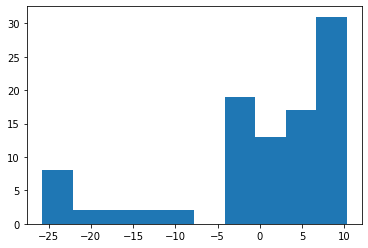

In [43]:
model = sm.OLS.from_formula('Life ~ GDP', data = data_file)
results = model.fit()
fitted_values = results.predict(data_file)
residuals = data_file.Life - fitted_values
plt.hist(residuals)
plt.show()

Given the above findings, we decided to approach each country's data separately and try to draw conclusions for individual countries.

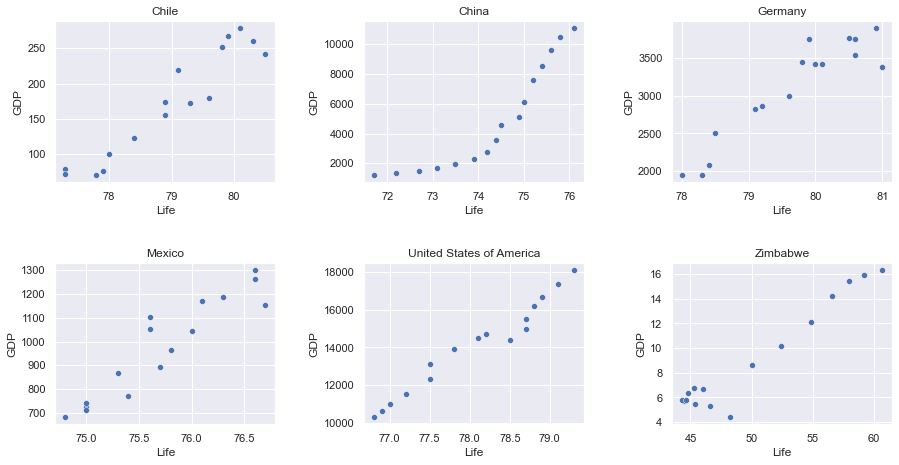

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize=[15,8])
counter = 0
for i in data_file.Country.unique():
    counter += 1
    plt.subplot(2,3,counter)
    sns.scatterplot(y = 'GDP', x = 'Life', data = data_file[data_file['Country']==i])
    plt.title(i)
# plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.) 
# plt.axis([1999,2016,-1000,19000])
# plt.title("GDP across years")
# plt.xlabel('Year')
# plt.ylabel('GDP (in billions)')
plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()


#Compare countries' GDP and life expectancy
	- bar chart comparing countries' GDP
	- bar chart comparing countries' life expectancy
	- scatter plot (?) - GDP vs life expectancy (hue = country)

#Check whether GDP can predict life expectancy
	- ?? Estimate the % difference in GDP between countries and their related % difference in life expectancy (median difference?)
	- ?? estimate the differences for every year
	- plot mean GDP and mean LE from every country